# Fair Market Rents (40th Percentile)

Fair Market Rents (FMRs) are used to determine payment standard amounts for the Housing Choice Voucher program, initial renewal rents for some expiring project-based Section 8 contracts, initial rents for housing assistance payment (HAP) contracts in the Moderate Rehabilitation Single Room Occupancy program (Mod Rehab), rent ceilings for rental units in both the HOME Investment Partnerships program and the Emergency Solutions Grants program, maximum award amounts for Continuum of Care recipients and the maximum amount of rent a recipient may pay for property leased with Continuum of Care funds, and flat rents in Public Housing units. The U.S. Department of Housing and Urban Development (HUD) annually estimates FMRs for Office of Management and Budget (OMB) defined metropolitan areas, some HUD defined subdivisions of OMB metropolitan areas, and each nonmetropolitan county. 42 USC 1437f requires FMRs be posted at least 30 days before they are effective and that they are effective at the start of the federal fiscal year (generally October 1). Fair Market Rents, as defined in 24 CFR 888.113 are estimates of 40th percentile gross rents for standard quality units within a metropolitan area or nonmetropolitan county.


Have datasets from:

https://www.unitedstateszipcodes.org/zip-code-database/

https://www.huduser.gov/portal/datasets/fmr.html#query_2024


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
zip_codes = pd.read_csv('zip_code_database.csv')
zip_codes = zip_codes[['zip', 'latitude', 'longitude', 'primary_city', 'state', 'county']]
zip_codes.rename(columns={'zip': 'ZIP Code',
                          'state': 'State',
                          'primary_city': 'City',
                          'county': 'County',
                          'latitude': 'Latitude',
                          'longitude': 'Longitude'}, inplace=True)
zip_codes.head()

,ZIP Code,Latitude,Longitude,City,State,County
0,501,40.81,-73.04,Holtsville,NY,Suffolk County
1,544,40.81,-73.04,Holtsville,NY,Suffolk County
2,601,18.16,-66.72,Adjuntas,PR,Adjuntas Municipio
3,602,18.38,-67.18,Aguada,PR,Aguada Municipio
4,603,18.43,-67.15,Aguadilla,PR,Aguadilla Municipio


In [73]:
zip_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42735 entries, 0 to 42734
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ZIP Code   42735 non-null  int64  
 1   Latitude   42735 non-null  float64
 2   Longitude  42735 non-null  float64
 3   City       42735 non-null  object 
 4   State      42735 non-null  object 
 5   County     41806 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [74]:
fmr_data = pd.read_excel('fy2024_safmrs_revised.xlsx')
fmr_data.columns = fmr_data.columns.str.replace('\n', ' ')
fmr_data.drop(fmr_data.filter(like='-').columns, axis=1, inplace=True)
fmr_data['Metro Area'] = fmr_data['HUD Metro Fair Market Rent Area Name'].str.split(',').str[0]
fmr_data.drop('HUD Area Code', axis=1, inplace=True)
fmr_data.drop('HUD Metro Fair Market Rent Area Name', axis=1, inplace=True)
fmr_data.head()

,ZIP Code,SAFMR 0BR,SAFMR 1BR,SAFMR 2BR,SAFMR 3BR,SAFMR 4BR,Metro Area
0,76437,700,710,910,1230,1490,Abilene
1,76443,700,710,910,1230,1490,Abilene
2,76464,700,710,910,1230,1490,Abilene
3,76469,700,710,910,1230,1490,Abilene
4,79501,820,830,1060,1410,1700,Abilene


In [75]:
fmr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27446 entries, 0 to 27445
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ZIP Code    27446 non-null  int64 
 1   SAFMR 0BR   27446 non-null  int64 
 2   SAFMR 1BR   27446 non-null  int64 
 3   SAFMR 2BR   27446 non-null  int64 
 4   SAFMR 3BR   27446 non-null  int64 
 5   SAFMR 4BR   27446 non-null  int64 
 6   Metro Area  27446 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [76]:
df = pd.merge(zip_codes, fmr_data, on='ZIP Code')
df.rename(columns = {'SAFMR 0BR': 'Studio',
                     'SAFMR 1BR': '1BR',
                     'SAFMR 2BR': '2BR',
                     'SAFMR 3BR': '3BR',
                     'SAFMR 4BR': '4BR',}, inplace=True)
df = df[['ZIP Code', 'Metro Area','City','State','Studio','1BR','2BR','3BR','4BR','County','Latitude','Longitude']]
df.head()

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude
0,601,Aguadilla-Isabela,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72
1,601,Ponce,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72
2,602,Aguadilla-Isabela,Aguada,PR,420,430,490,600,670,Aguada Municipio,18.38,-67.18
3,603,Aguadilla-Isabela,Aguadilla,PR,500,510,580,710,800,Aguadilla Municipio,18.43,-67.15
4,604,Aguadilla-Isabela,Aguadilla,PR,510,520,590,720,810,NaN,18.43,-67.15


In [77]:
pre = ['ZIP Code','Metro Area','City','State']
selected = ['3BR','Studio','1BR']
post = ['County','Latitude','Longitude']
cols = pre + selected + post

In [78]:
df[pre + selected + post]

,ZIP Code,Metro Area,City,State,3BR,Studio,1BR,County,Latitude,Longitude
0,601,Aguadilla-Isabela,Adjuntas,PR,670,410,420,Adjuntas Municipio,18.16,-66.72
1,601,Ponce,Adjuntas,PR,670,410,420,Adjuntas Municipio,18.16,-66.72
2,602,Aguadilla-Isabela,Aguada,PR,600,420,430,Aguada Municipio,18.38,-67.18
3,603,Aguadilla-Isabela,Aguadilla,PR,710,500,510,Aguadilla Municipio,18.43,-67.15
4,604,Aguadilla-Isabela,Aguadilla,PR,720,510,520,NaN,18.43,-67.15
...,...,...,...,...,...,...,...,...,...,...
27441,99725,Fairbanks,Ester,AK,2330,1120,1260,Fairbanks North Star Borough,64.85,-148.02
27442,99729,Matanuska-Susitna Borough,Cantwell,AK,1800,920,970,Denali Borough,63.01,-149.40
27443,99760,Fairbanks,Nenana,AK,2330,1120,1260,Yukon-Koyukuk Census Area,64.47,-148.57
27444,99775,Fairbanks,Fairbanks,AK,2070,1000,1120,Fairbanks North Star Borough,64.86,-147.83


In [79]:
df[cols]

,ZIP Code,Metro Area,City,State,3BR,Studio,1BR,County,Latitude,Longitude
0,601,Aguadilla-Isabela,Adjuntas,PR,670,410,420,Adjuntas Municipio,18.16,-66.72
1,601,Ponce,Adjuntas,PR,670,410,420,Adjuntas Municipio,18.16,-66.72
2,602,Aguadilla-Isabela,Aguada,PR,600,420,430,Aguada Municipio,18.38,-67.18
3,603,Aguadilla-Isabela,Aguadilla,PR,710,500,510,Aguadilla Municipio,18.43,-67.15
4,604,Aguadilla-Isabela,Aguadilla,PR,720,510,520,NaN,18.43,-67.15
...,...,...,...,...,...,...,...,...,...,...
27441,99725,Fairbanks,Ester,AK,2330,1120,1260,Fairbanks North Star Borough,64.85,-148.02
27442,99729,Matanuska-Susitna Borough,Cantwell,AK,1800,920,970,Denali Borough,63.01,-149.40
27443,99760,Fairbanks,Nenana,AK,2330,1120,1260,Yukon-Koyukuk Census Area,64.47,-148.57
27444,99775,Fairbanks,Fairbanks,AK,2070,1000,1120,Fairbanks North Star Borough,64.86,-147.83


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27446 entries, 0 to 27445
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ZIP Code    27446 non-null  int64  
 1   Metro Area  27446 non-null  object 
 2   City        27446 non-null  object 
 3   State       27446 non-null  object 
 4   Studio      27446 non-null  int64  
 5   1BR         27446 non-null  int64  
 6   2BR         27446 non-null  int64  
 7   3BR         27446 non-null  int64  
 8   4BR         27446 non-null  int64  
 9   County      27405 non-null  object 
 10  Latitude    27446 non-null  float64
 11  Longitude   27446 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 2.7+ MB


In [81]:
df['Location'] = df['City'] + ', ' + df['State']
df.to_csv('cleaned_housing_data.csv', index=False)

In [82]:
selected

['3BR', 'Studio', '1BR']

In [83]:
sorted(selected)

['1BR', '3BR', 'Studio']

Day 2: 
Add Folium choropleth maps

<Axes: >

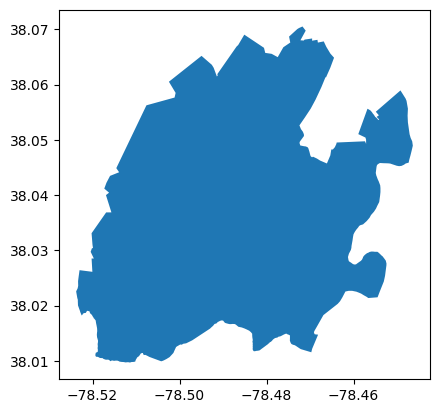

In [84]:
import geopandas as gpd
cville_boundary = gpd.read_file('Charlottesville_Basemap.geojson')
cville_boundary.plot()

In [85]:
cville_boundary

,OBJECTID,FID_MASK,ID,SHAPEarea,SHAPElen,geometry
0,1,-1,0,3.050647e+08,106729.765984,"POLYGON Z ((-78.44804 38.05749 0, -78.44921 38..."


In [86]:
roads = gpd.read_file('Road_Centerlines.shp')
roads.head()

,geometry
0,"LINESTRING (-78.51325 38.02047, -78.51321 38.0..."
1,"LINESTRING (-78.51179 38.02446, -78.51178 38.0..."
2,"LINESTRING (-78.51246 38.02704, -78.5126 38.02..."
3,"LINESTRING (-78.51186 38.02593, -78.51183 38.0..."
4,"LINESTRING (-78.51214 38.02724, -78.51246 38.0..."


<Axes: >

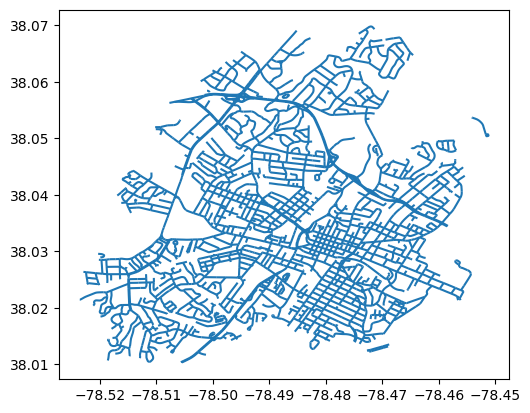

In [87]:
roads.plot()

<Axes: >

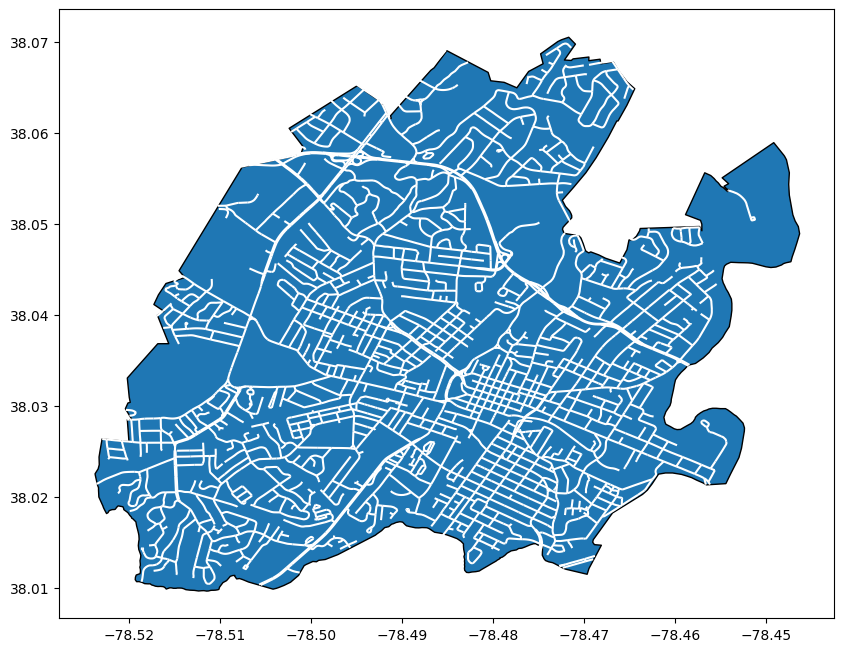

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
cville_boundary.plot(ax=ax, edgecolor='black')
roads.plot(ax=ax, color='white')

C:\Users\ddg12\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


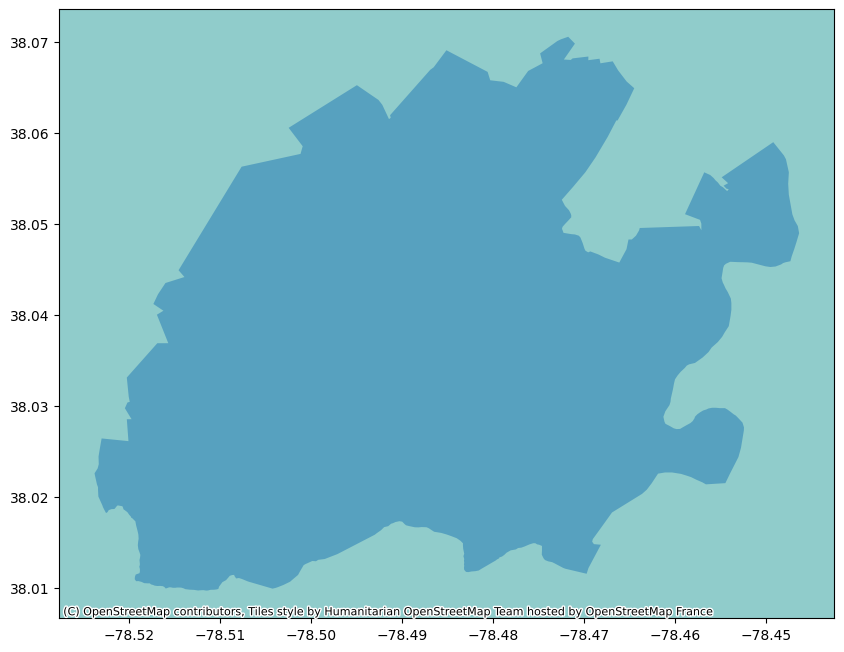

In [89]:
import contextily
ax = cville_boundary.plot(figsize=(10,8), alpha=0.5)
contextily.add_basemap(ax, crs=roads.crs)

In [90]:
import folium

m = folium.Map(
    location=[38.0293, -78.4767],
    zoom_start=12,
)
m

In [91]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [92]:
state_geo

'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'

In [93]:
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [94]:
cville_boundary

,OBJECTID,FID_MASK,ID,SHAPEarea,SHAPElen,geometry
0,1,-1,0,3.050647e+08,106729.765984,"POLYGON Z ((-78.44804 38.05749 0, -78.44921 38..."


In [95]:
cville_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
mymap = folium.Map(location = [38.0293, -78.4767], zoom_start = 12)

In [97]:
for _, r in cville_boundary.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    geo_j.add_to(mymap)

mymap

In [98]:
# Adding a projected coordinate system
m = mymap = folium.Map(location = [38.0293, -78.4767], zoom_start = 12)
cville_boundary2 = cville_boundary.to_crs(epsg=4326)
cville_boundary2['centroid'] = cville_boundary2['geometry'].centroid
for _, r in cville_boundary2.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    geo_j.add_to(mymap)
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker([lat, lon],
                  popup='Adding text').add_to(mymap)

mymap

C:\Users\ddg12\AppData\Local\Temp\ipykernel_10252\2416123304.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cville_boundary2['centroid'] = cville_boundary2['geometry'].centroid


In [99]:
census_tracts = gpd.read_file('tl_2020_us_zcta520.shp')
census_tracts.rename(columns={'ZCTA5CE20': 'ZIP Code'}, inplace=True)
census_tracts = census_tracts[['ZIP Code', 'geometry']]
census_tracts['ZIP Code'] = census_tracts['ZIP Code'].astype(int)
census_tracts.head()

,ZIP Code,geometry
0,35592,"POLYGON ((-88.24735 33.6539, -88.24713 33.6541..."
1,35616,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,"POLYGON ((-86.81659 34.3496, -86.81648 34.3496..."
3,35651,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [100]:
census_tracts.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33791 entries, 0 to 33790
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ZIP Code  33791 non-null  int32   
 1   geometry  33791 non-null  geometry
dtypes: geometry(1), int32(1)
memory usage: 396.1 KB


In [31]:
#census_tracts.to_csv('census_tracts.csv', index=False)

In [101]:
df.head()

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,Location
0,601,Aguadilla-Isabela,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72,"Adjuntas, PR"
1,601,Ponce,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72,"Adjuntas, PR"
2,602,Aguadilla-Isabela,Aguada,PR,420,430,490,600,670,Aguada Municipio,18.38,-67.18,"Aguada, PR"
3,603,Aguadilla-Isabela,Aguadilla,PR,500,510,580,710,800,Aguadilla Municipio,18.43,-67.15,"Aguadilla, PR"
4,604,Aguadilla-Isabela,Aguadilla,PR,510,520,590,720,810,NaN,18.43,-67.15,"Aguadilla, PR"


In [102]:
df = pd.merge(df, census_tracts, on='ZIP Code')
df.head()

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,Location,geometry
0,601,Aguadilla-Isabela,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72,"Adjuntas, PR","POLYGON ((-66.83637 18.21014, -66.83602 18.210..."
1,601,Ponce,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72,"Adjuntas, PR","POLYGON ((-66.83637 18.21014, -66.83602 18.210..."
2,602,Aguadilla-Isabela,Aguada,PR,420,430,490,600,670,Aguada Municipio,18.38,-67.18,"Aguada, PR","POLYGON ((-67.24044 18.38004, -67.23931 18.380..."
3,603,Aguadilla-Isabela,Aguadilla,PR,500,510,580,710,800,Aguadilla Municipio,18.43,-67.15,"Aguadilla, PR","POLYGON ((-67.17325 18.4768, -67.17253 18.4804..."
4,606,San German,Maricao,PR,390,400,470,610,650,Maricao Municipio,18.18,-66.98,"Maricao, PR","POLYGON ((-67.05144 18.17416, -67.05134 18.174..."


In [103]:
df[df['ZIP Code'] == 22903]

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,Location,geometry
5874,22903,Charlottesville,Charlottesville,VA,1420,1440,1710,2150,2660,Charlottesville city,38.01,-78.6,"Charlottesville, VA","POLYGON ((-78.74191 38.01191, -78.74189 38.011..."


In [104]:
df[df['ZIP Code'] == 92107]

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,Location,geometry
21112,92107,San Diego-Carlsbad,San Diego,CA,2190,2390,3010,4060,4930,San Diego County,32.74,-117.25,"San Diego, CA","POLYGON ((-117.26072 32.72617, -117.25922 32.7..."


In [105]:
small_df = df.iloc[21100:21150]

In [106]:
m = folium.Map(location = [32.74, -117.25], zoom_start = 12, min_zoom=10, max_zoom=15)

tooltip = folium.GeoJsonTooltip(fields=['ZIP Code', 'City', 'Studio', '1BR', '2BR', '3BR', '4BR'],
                                 aliases=['ZIP Code:', 'City:', 'Studio:', '1BR:', '2BR:', '3BR:', '4BR:'],
                                 localize=True, sticky=False, labels=True, 
                                 style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))


for _, r in small_df.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001,preserve_topology=True)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    geo_j.add_to(m)
    lat = r['Latitude']
    lon = r['Longitude']

    iframe = folium.IFrame('City: {} <br> ZIP Code: {} <br> Studio: ${} <br> 1BR: ${} <br> 2BR: ${} <br> 3BR: ${} <br> 4BR: ${}'.format(r['City'],r['ZIP Code'], r['Studio'], r['1BR'], r['2BR'], r['3BR'], r['4BR']), height=150)
    popup = folium.Popup(iframe, min_width=150, max_width=200)
    folium.Marker([lat, lon], popup=popup, tooltip=tooltip).add_to(m)
m

In [38]:
# Display Choropleth
def display_choropleth(df, zip_data, bedrooms):
    # Create
    m = folium.Map(location = [float(zip_data['Latitude']), float(zip_data['Longitude'])], zoom_start = 12, min_zoom=10, max_zoom=15)
    
    choropleth = folium.Choropleth(
    geo_data=df.to_json(),
    data=map_df,
    columns=['ZIP Code'] + bedrooms,
    key_on='feature.properties.ZIP Code',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Fair Market Rent'
    ).add_to(m)
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(fields=['ZIP Code', bedrooms],labels=False)
    )
    st_folium(m, width=1200, height=900)

In [107]:
small_geo = small_df[['ZIP Code', 'geometry']]
small_geo = small_geo[small_geo['geometry'].notnull()]

In [ ]:
m = folium.Map(location = [38.0293, -78.4767], zoom_start = 12, min_zoom=10, max_zoom=15)
choropleth = folium.Choropleth(
    geo_data=small_geo,
    data=small_df,
    columns=['ZIP Code', 'Studio'],
    key_on='feature.properties.ZIP Code',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Fair Market Rent'
).add_to(m)
m

In [54]:
m = folium.Map(location = [32.74, -117.25], zoom_start = 12, min_zoom=10, max_zoom=15)

tooltip = folium.GeoJsonTooltip(fields=['ZIP Code', 'City', 'Studio', '1BR', '2BR', '3BR', '4BR'],
                                 aliases=['ZIP Code:', 'City:', 'Studio:', '1BR:', '2BR:', '3BR:', '4BR:'],
                                 localize=True, sticky=False, labels=True, 
                                 style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))
g = folium.GeoJson(
    gpd.GeoDataFrame(small_df, geometry='geometry'),
    name='geojson',
    style_function=lambda x: {'fillColor': 'orange'},
    tooltip=tooltip,
).add_to(m)
m

In [55]:
def display_geojson(df):
    m = folium.Map(location = [32.74, -117.25], zoom_start = 12, min_zoom=10, max_zoom=15)

    tooltip = folium.GeoJsonTooltip(fields=['ZIP Code', 'City', 'Studio', '1BR', '2BR', '3BR', '4BR'],
                                    aliases=['ZIP Code:', 'City:', 'Studio:', '1BR:', '2BR:', '3BR:', '4BR:'],
                                    localize=True, sticky=False, labels=True, 
                                    style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))
    g = folium.GeoJson(
        gpd.GeoDataFrame(small_df, geometry='geometry'),
        name='geojson',
        style_function=lambda x: {'fillColor': 'orange'},
        tooltip=tooltip,
    ).add_to(m)
    return m
display_geojson(small_df)

In [108]:
cho = df[df['ZIP Code'] == 22903]
san = df[df['ZIP Code'] == 92101]

In [109]:
def create_folium_map(df, zip_data):
    m = folium.Map(location = [float(zip_data['Latitude'].iloc[0]), float(zip_data['Longitude'].iloc[0])], zoom_start = 12, min_zoom=10, max_zoom=15)

    tooltip = folium.GeoJsonTooltip(fields=['ZIP Code', 'City', 'Studio', '1BR', '2BR', '3BR', '4BR'],
                                    aliases=['ZIP Code:', 'City:', 'Studio:', '1BR:', '2BR:', '3BR:', '4BR:'],
                                    localize=True, sticky=False, labels=True, 
                                    style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))
    g = folium.GeoJson(
        gpd.GeoDataFrame(df, geometry='geometry'),
        name='geojson',
        style_function=lambda x: {'fillColor': 'orange'},
        tooltip=tooltip,
        highlight_function=lambda x: {'weight': 3, 'fillColor': 'blue'},
        ).add_to(m)
    return m

create_folium_map(small_df, san)

In [63]:
# Lat and Lon
# 1 Degree of Lat = 69 Miles
# 1 Degree of Lon = 69 * cos(Lat) Miles
def miles_to_degrees(miles):
    lat_degrees = miles / 69
    lon_degrees = miles / (69.17 * np.cos(np.radians(ax.get_ylim()[0])))
    return lat_degrees, lon_degrees

miles_to_degrees(50)

(0.7246376811594203, 0.9174014212472071)

In [69]:
from geopy.distance import distance
def limit_data_by_radius(df, center_lat, center_lon, radius_miles):
    def is_within_radius(row):
        point = (row['Latitude'], row['Longitude'])
        center_point = (center_lat, center_lon)
        return distance(center_point, point).miles <= radius_miles
    
    return df[df.apply(is_within_radius, axis=1)]

limit_data_by_radius(df, 38.01, -78.6, 50)

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,geometry
5761,22508,Washington-Arlington-Alexandria,Locust Grove,VA,1440,1460,1660,2070,2450,Orange County,38.33,-77.79,"POLYGON ((-77.86102 38.26472, -77.86089 38.265..."
5771,22567,Washington-Arlington-Alexandria,Unionville,VA,1230,1250,1420,1770,2110,Orange County,38.25,-77.96,"POLYGON ((-77.99792 38.28212, -77.99756 38.282..."
5805,22701,Madison County,Culpeper,VA,950,950,1240,1600,1880,Culpeper County,38.47,-78.00,"POLYGON ((-78.17878 38.38465, -78.17828 38.391..."
5806,22701,Culpeper County,Culpeper,VA,950,950,1240,1600,1880,Culpeper County,38.47,-78.00,"POLYGON ((-78.17878 38.38465, -78.17828 38.391..."
5807,22709,Madison County,Aroda,VA,790,790,1040,1280,1530,Madison County,38.32,-78.24,"POLYGON ((-78.27194 38.33292, -78.27192 38.333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,24581,Charlottesville,Norwood,VA,1050,1060,1270,1570,1950,Nelson County,37.66,-78.81,"POLYGON ((-78.83065 37.65028, -78.83063 37.650..."
6325,24590,Charlottesville,Scottsville,VA,1170,1190,1410,1780,2190,Fluvanna County,37.79,-78.49,"POLYGON ((-78.64392 37.73308, -78.6437 37.7337..."
6326,24593,Lynchburg,Spout Spring,VA,930,950,1070,1460,1590,Appomattox County,37.35,-78.91,"POLYGON ((-78.9676 37.34039, -78.96753 37.3404..."
6327,24595,Lynchburg,Sweet Briar,VA,910,930,1050,1430,1570,Amherst County,37.56,-79.08,"POLYGON ((-79.0967 37.55107, -79.09667 37.5511..."


In [65]:
df[df['ZIP Code'] == 22903]

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,geometry
5874,22903,Charlottesville,Charlottesville,VA,1420,1440,1710,2150,2660,Charlottesville city,38.01,-78.6,"POLYGON ((-78.74191 38.01191, -78.74189 38.011..."


In [110]:
df.head(2)

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,Location,geometry
0,601,Aguadilla-Isabela,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72,"Adjuntas, PR","POLYGON ((-66.83637 18.21014, -66.83602 18.210..."
1,601,Ponce,Adjuntas,PR,410,420,470,670,750,Adjuntas Municipio,18.16,-66.72,"Adjuntas, PR","POLYGON ((-66.83637 18.21014, -66.83602 18.210..."


In [121]:
location_data = df[df['Location'] == 'Charlottesville, VA'].iloc[:1]
location_data

,ZIP Code,Metro Area,City,State,Studio,1BR,2BR,3BR,4BR,County,Latitude,Longitude,Location,geometry
5872,22901,Charlottesville,Charlottesville,VA,1420,1440,1710,2150,2660,Albemarle County,38.09,-78.56,"Charlottesville, VA","POLYGON ((-78.67546 38.06859, -78.67539 38.068..."


In [122]:
location_data['Latitude'].iloc[0]

38.09